In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from helpers.collection_of_experiments import CollectionOfExperiments
from helpers.plot_helpers import *
from helpers.computational_tools import remesh, select_LatLon, Lk_error, x_coord, y_coord, diffx_tv, diffx_uq, diffy_vq, diffy_tu, filter_apply, filter_iteration, compute_isotropic_KE
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings("ignore")

In [2]:
ds = CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Feb2022/bare', additional_subfolder='output')
ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/R4/Smagorinsky', additional_subfolder='output')
ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/R4/Smagorinsky-ZB', additional_subfolder='output')
ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/R4/Smagorinsky-ZB-dt', additional_subfolder='output')
ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/R4/Smagorinsky-ZB-layers', additional_subfolder='output')
ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/R4/Smagorinsky-ZB-filters', additional_subfolder='output')
ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/R4/Smagorinsky-ZB-HPF', additional_subfolder='output')
ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/R4/Smagorinsky-ZB-HPF-LPF', additional_subfolder='output')
ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/R4/random-sampled', additional_subfolder='output')
ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/R4/Smagorinsky-ZB-1D/momentum-4-1', additional_subfolder='output', prefix='momentum-4-1')
ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/R4/Smagorinsky-ZB-1D/HPF', additional_subfolder='output', prefix='HPF')
ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/R4/Smagorinsky-ZB-1D/HPF-LPF', additional_subfolder='output', prefix='HPF-LPF')
ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/R4/Smagorinsky-ZB-1D/HPF-LPF', additional_subfolder='output', prefix='HPF-LPF')
ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/R4/Smagorinsky-ZB-1D/best', additional_subfolder='output', prefix='best')
ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/R4/Smagorinsky-ZB-1D/best-noLPF', additional_subfolder='output', prefix='best-noLPF')
ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/R4/Smagorinsky-ZB-1D/best-noStress', additional_subfolder='output', prefix='best-noStress')
ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/R4/Smagorinsky-ZB-1D/best-HPFonly', additional_subfolder='output', prefix='best-HPFonly')
ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/R4/JansenHeld', additional_subfolder='output')

In [3]:
ds += CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/generalization', additional_subfolder='output')

Error, cannot find files in folder/scratch/pp2681/mom6/Apr2022/generalization/R2_EXP205-repeat/output


In [3]:
ds.exps

['R16',
 'R2',
 'R32',
 'R4',
 'R64',
 'R8',
 'Cs-0.001',
 'Cs-0.002',
 'Cs-0.005',
 'Cs-0.01',
 'Cs-0.02',
 'Cs-0.03',
 'Cs-0.04',
 'Cs-0.05',
 'Cs-0.06',
 'Cs-0.06-new-bin',
 'Cs-0.06-new-bin-and-MOM_override',
 'Cs-0.06-repeat',
 'Cs-0.07',
 'Cs-0.08',
 'Cs-0.09',
 'Cs-0.1',
 'Cs-0.01-ZB-0-24',
 'Cs-0.01-ZB-1-24',
 'Cs-0.01-ZB-10-24',
 'Cs-0.01-ZB-2-24',
 'Cs-0.01-ZB-3-24',
 'Cs-0.01-ZB-4-24',
 'Cs-0.01-ZB-5-24',
 'Cs-0.01-ZB-6-24',
 'Cs-0.01-ZB-7-24',
 'Cs-0.01-ZB-8-24',
 'Cs-0.01-ZB-9-24',
 'Cs-0.02-ZB-0-24',
 'Cs-0.02-ZB-1-24',
 'Cs-0.02-ZB-10-24',
 'Cs-0.02-ZB-2-24',
 'Cs-0.02-ZB-3-24',
 'Cs-0.02-ZB-4-24',
 'Cs-0.02-ZB-5-24',
 'Cs-0.02-ZB-6-24',
 'Cs-0.02-ZB-7-24',
 'Cs-0.02-ZB-8-24',
 'Cs-0.02-ZB-9-24',
 'Cs-0.03-ZB-0-24',
 'Cs-0.03-ZB-1-24',
 'Cs-0.03-ZB-10-24',
 'Cs-0.03-ZB-2-24',
 'Cs-0.03-ZB-3-24',
 'Cs-0.03-ZB-4-24',
 'Cs-0.03-ZB-5-24',
 'Cs-0.03-ZB-6-24',
 'Cs-0.03-ZB-7-24',
 'Cs-0.03-ZB-8-24',
 'Cs-0.03-ZB-9-24',
 'Cs-0.04-ZB-0-24',
 'Cs-0.04-ZB-1-24',
 'Cs-0.04-ZB-10-24

In [4]:
ds.remesh('R64','R4',compute=False)

Experiment R64 coarsegrained to R4 is created. Its identificator=R64_R4


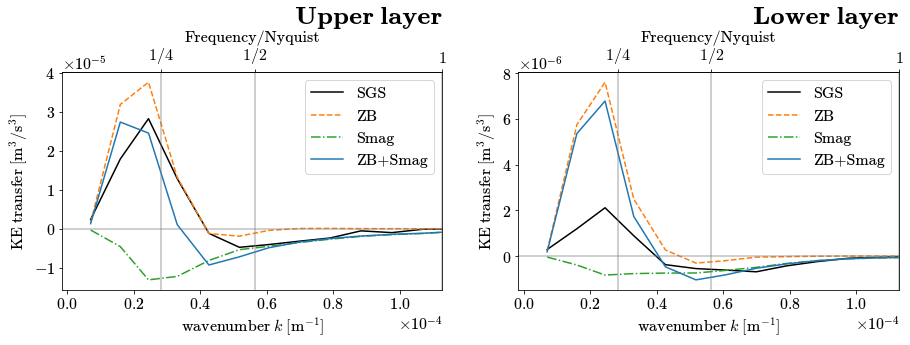

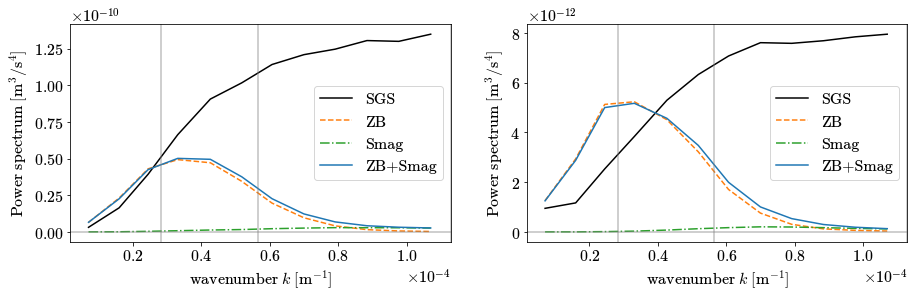

In [10]:
ds.plot_transfer('EXP205')

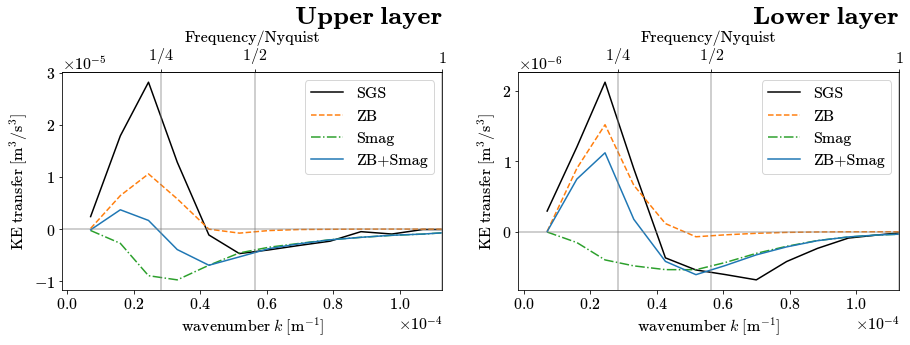

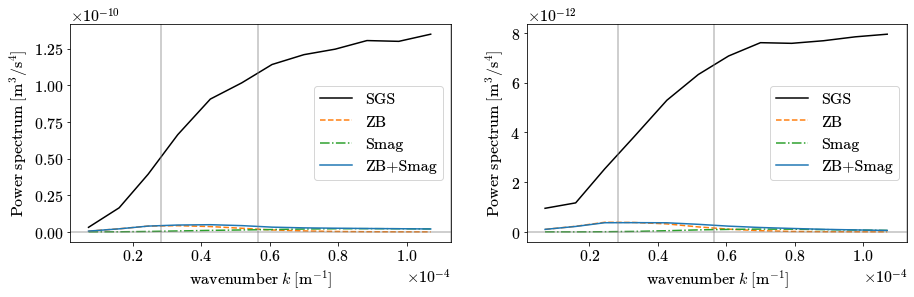

In [289]:
ds.plot_transfer('best-EXP9',callback=True)

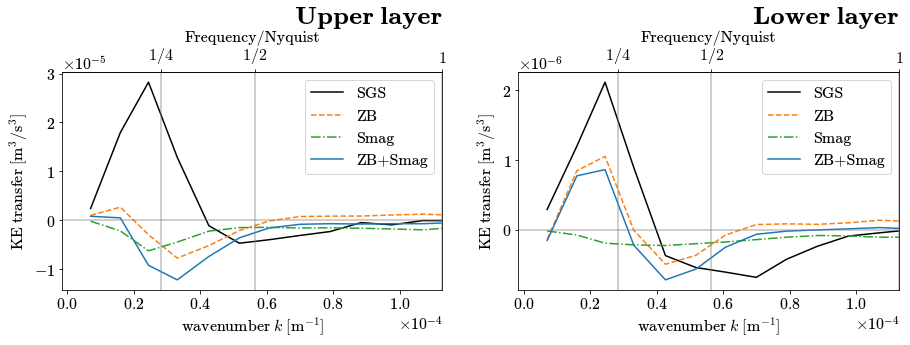

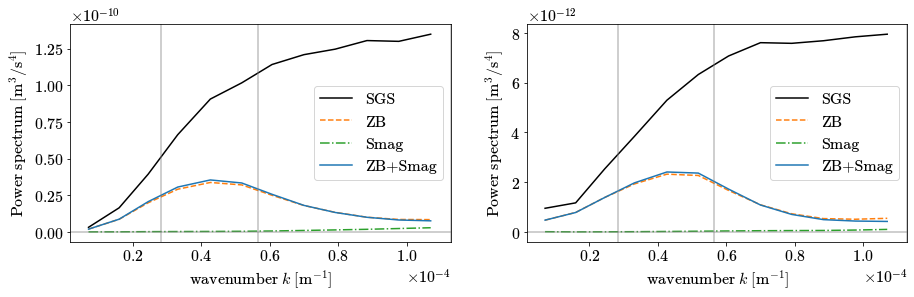

In [366]:
ds.plot_transfer('best-noStress-EXP40', callback=True)

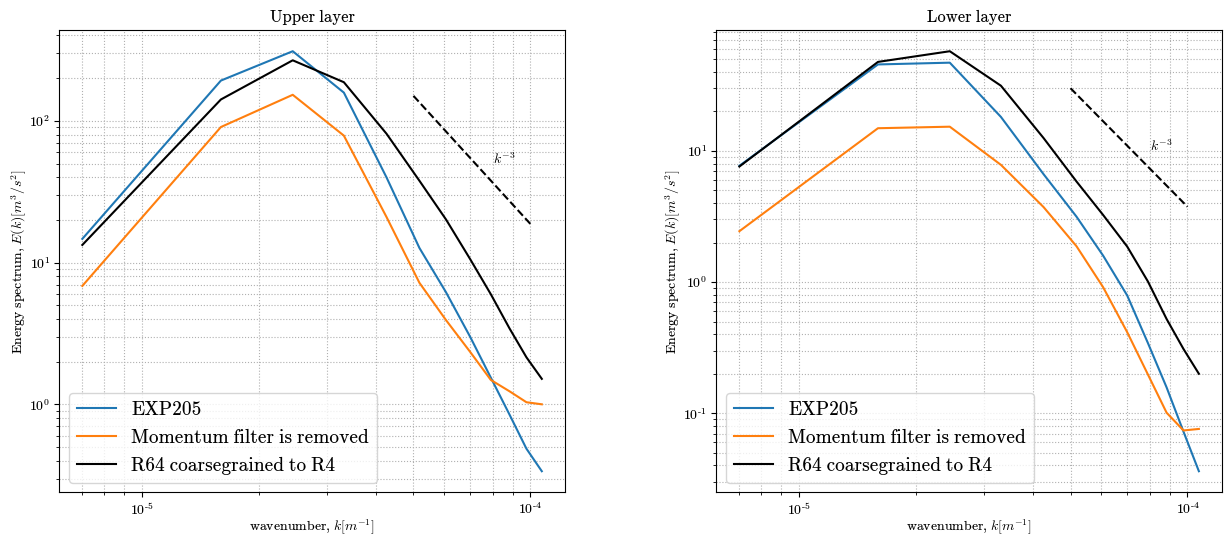

In [314]:
ds.plot_KE_spectrum(['best-EXP28', 'best-noStress-EXP28', 'R64_R4'], key='EKE_spectrum',labels=['EXP205', 'Momentum filter is removed', 'R64 coarsegrained to R4'])
plt.savefig('Importance of Momentum filter.pdf')

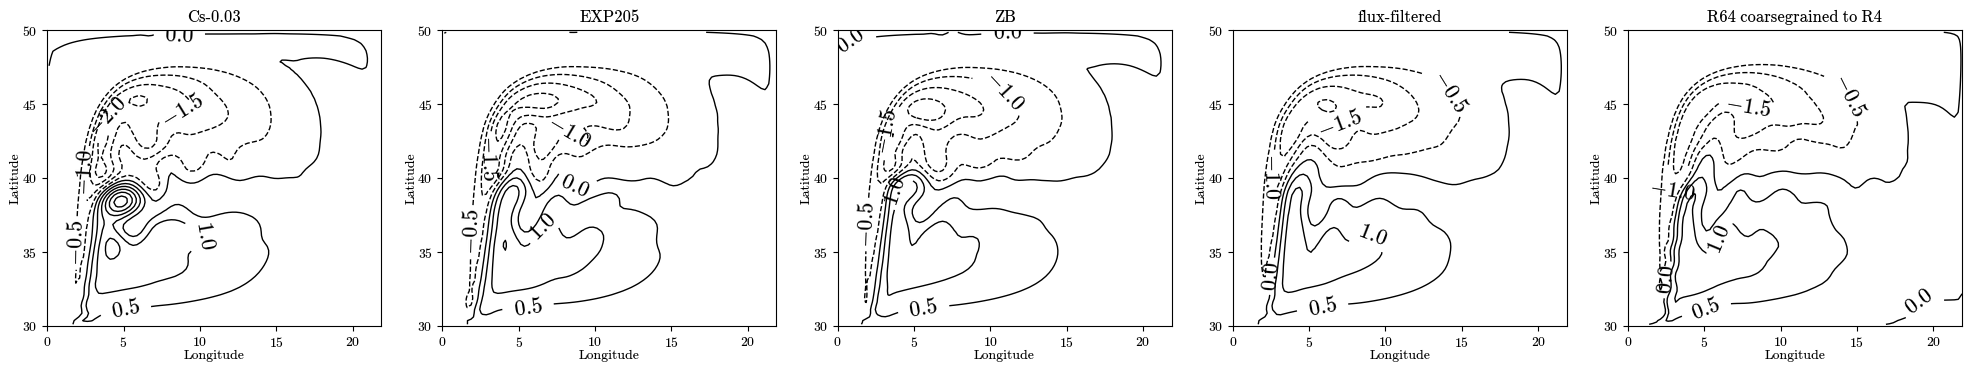

In [358]:
ds.plot_ssh(['Cs-0.03', 'EXP205', 'upper-6-24-lower-6-24', 'momentum-4-1-amplitude-0.75', 'R64_R4'], labels=['Cs-0.03','EXP205', 'ZB', 'flux-filtered', 'R64 coarsegrained to R4'])
plt.savefig('ssh-EXP205-mom.pdf')

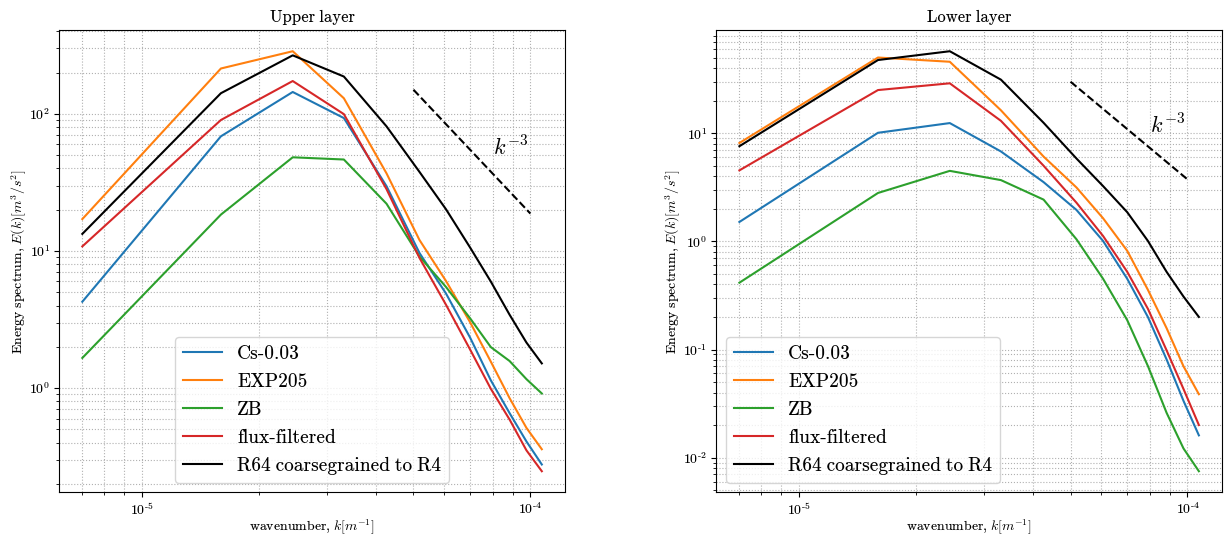

In [355]:
ds.plot_KE_spectrum(['Cs-0.03', 'EXP205', 'upper-6-24-lower-6-24', 'momentum-4-1-amplitude-0.75', 'R64_R4'], key='EKE_spectrum',labels=['Cs-0.03','EXP205', 'ZB', 'flux-filtered', 'R64 coarsegrained to R4'])
plt.savefig('EKE-EXP205-mom.pdf')

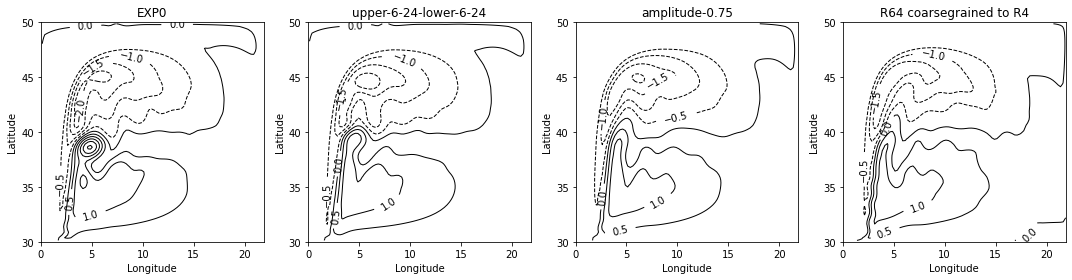

In [164]:
ds.plot_ssh(['best-EXP0', 'upper-6-24-lower-6-24', 'momentum-4-1-amplitude-0.75', 'R64_R4'])

In [388]:
Lk_error(ds['best-EXP0'].ssh_mean,ds['R64_R4'].ssh_mean,False)

[0.2059668]

In [357]:
Lk_error(ds['upper-6-24-lower-6-24'].ssh_mean,ds['R64_R4'].ssh_mean,False)

[0.15878297]

In [349]:
Lk_error(ds['Cs-0.03'].ssh_mean,ds['R64_R4'].ssh_mean,False)

[0.22839361]

In [387]:
Lk_error(ds['momentum-4-1-amplitude-0.75'].ssh_mean,ds['R64_R4'].ssh_mean,False)

[0.112858385]

In [28]:
fun = lambda time: ds['best-EXP28'].velocity.isel(zl=0,Time=time).plot(cmap='inferno')

In [320]:
Lk_error(ds['EXP205'].ssh_mean,ds['R64_R4'].ssh_mean,False)

[0.11194565]

In [29]:
create_animation(fun,range(243),'best-EXP28.gif')

Animation at FPS=18 will last for 13.5 seconds


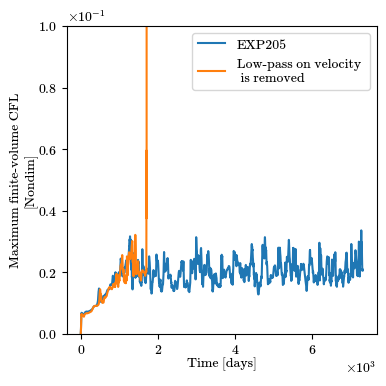

In [303]:
default_rcParams()
stats = xr.open_dataset('/scratch/pp2681/mom6/Apr2022/R4/Smagorinsky-ZB-1D/best/EXP11/output/ocean.stats.nc', decode_times=False)
stats.max_CFL_trans.plot(label='EXP205')
stats = xr.open_dataset('/scratch/pp2681/mom6/Apr2022/R4/Smagorinsky-ZB-1D/best-noLPF/EXP10/output/ocean.stats.nc', decode_times=False)
stats.max_CFL_trans.plot(label='Low-pass on velocity \n is removed')
plt.legend()
plt.ylim([0,0.1])
plt.savefig('LPF-importance.pdf')

In [309]:
ds['best-EXP'].RV_f.isel(zl=0,Time=-1).plot(vmax)

NameError: name 'vmax' is not defined

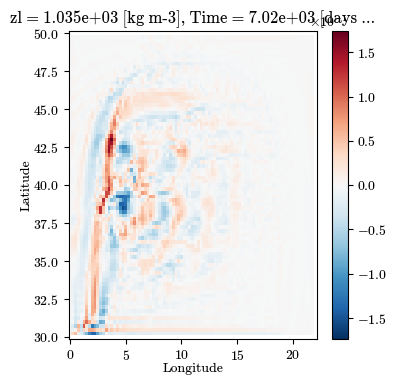

In [308]:
ds['best-noStress-EXP40'].RV_f.isel(zl=0,Time=-10).plot()

(0.0, 7000000000000000.0)

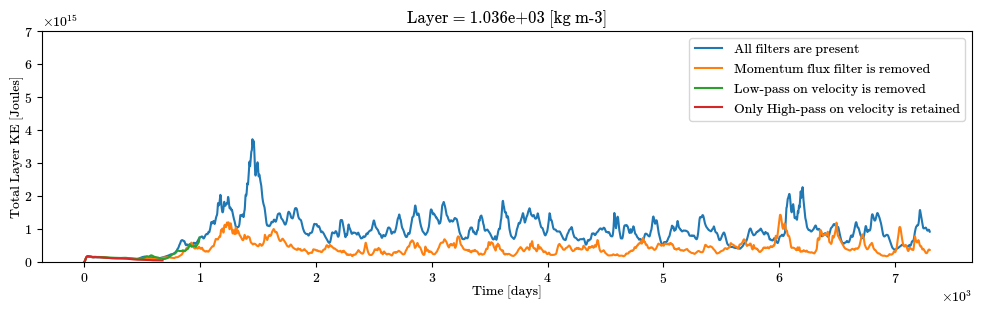

In [63]:
default_rcParams()
plt.figure(figsize=(12,3))
stats = xr.open_dataset('/scratch/pp2681/mom6/Apr2022/R4/Smagorinsky-ZB-1D/best/EXP28/output/ocean.stats.nc', decode_times=False)
stats.KE.isel(Layer=1).plot(label='All filters are present')
stats = xr.open_dataset('/scratch/pp2681/mom6/Apr2022/R4/Smagorinsky-ZB-1D/best-noStress/EXP28/output/ocean.stats.nc', decode_times=False)
stats.KE.isel(Layer=1).plot(label='Momentum flux filter is removed')
stats = xr.open_dataset('/scratch/pp2681/mom6/Apr2022/R4/Smagorinsky-ZB-1D/best-noLPF/EXP28/output/ocean.stats.nc', decode_times=False)
stats.KE.isel(Layer=1).plot(label='Low-pass on velocity is removed')
stats = xr.open_dataset('/scratch/pp2681/mom6/Apr2022/R4/Smagorinsky-ZB-1D/best-HPFonly/EXP28/output/ocean.stats.nc', decode_times=False)
stats.KE.isel(Layer=1).plot(label='Only High-pass on velocity is retained')
plt.legend()
plt.ylim([0, 7e+15])



In [4]:
def energy_metric(exp, target='R64_R4'):
    return sum(ds[exp].Lk_error(ds[target], features=['EKE_joul','MKE_joul','EPE_joul','MPE_joul'])[0])/6

In [5]:
def plot_min(x,y,**kw):
    j = np.nanargmin(y)
    line = plt.plot(x,y,**kw)
    plt.plot(x[j],y[j],marker='o',color=line[0].get_color())
    plt.axhline(y=y[j], ls='--',color=line[0].get_color())

In [6]:
def plot_amp_error(amp=np.linspace(0,10,41),exps=[f'best-EXP{j}' for j in range(41)]):
    plt.figure(figsize=(7,4))
    error = np.zeros((len(amp),4))*np.nan
    for j,exp in enumerate(exps):
        try:
            error[j,:2] = Lk_error(ds[exp].EKE_spectrum,ds['R64_R4'].EKE_spectrum)
            error[j,2:3] = Lk_error(ds[exp].ssh_mean,ds['R64_R4'].ssh_mean)
            error[j,3] = energy_metric(exp)
        except:
            pass
    plot_min(amp,error[:,0], label='upper EKE spectrum')
    plot_min(amp,error[:,1], label='lower EKE spectrum')
    plot_min(amp,error[:,2], label='ssh')
    plot_min(amp,error[:,3], label='Energy metric')
    plt.legend(bbox_to_anchor=(1,1))
    plt.xlabel('Ampllitude')
    plt.ylabel('Non-dimensional online metric')
    plt.ylim([0,1])

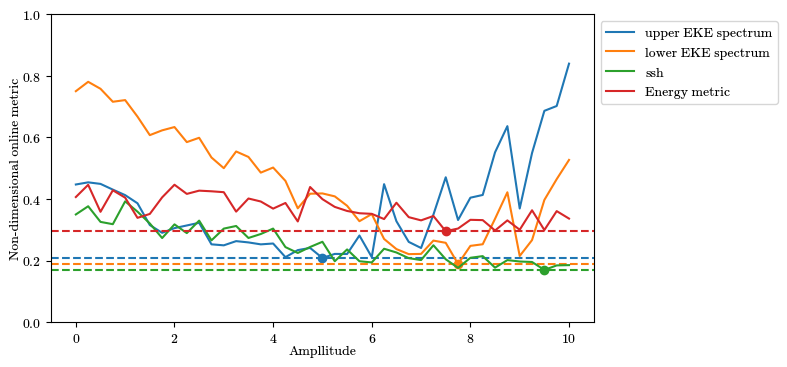

In [94]:
plot_amp_error()

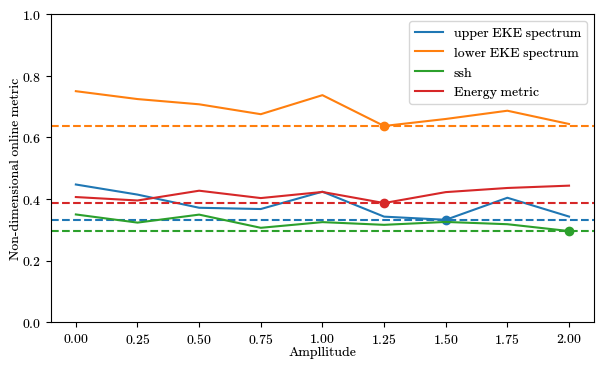

In [95]:
plot_amp_error(exps=[f'best-noLPF-EXP{j}' for j in range(41)])

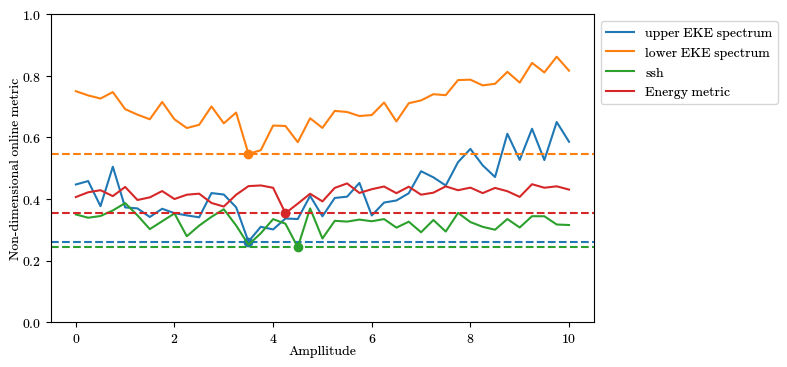

In [96]:
plot_amp_error(exps=[f'best-noStress-EXP{j}' for j in range(41)])

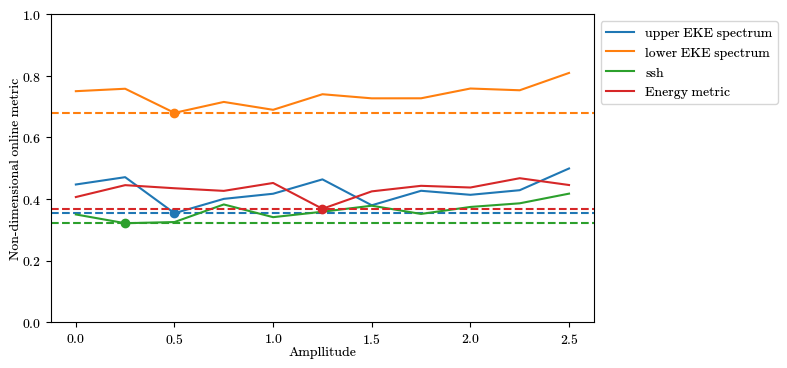

In [97]:
plot_amp_error(exps=[f'best-HPFonly-EXP{j}' for j in range(41)])

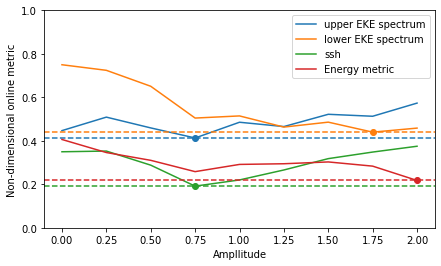

In [13]:
plot_amp_error(exps=[f'momentum-4-1-amplitude-{j/4.0}' for j in range(41)])

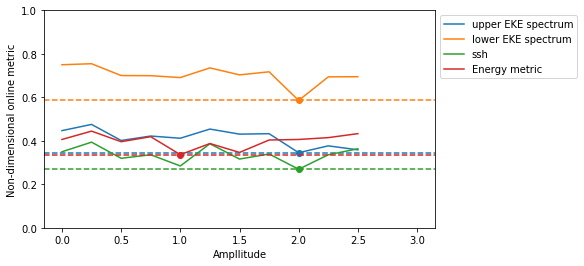

In [50]:
plot_amp_error(exps=[f'HPF-amplitude-{j/4.0}' for j in range(41)])

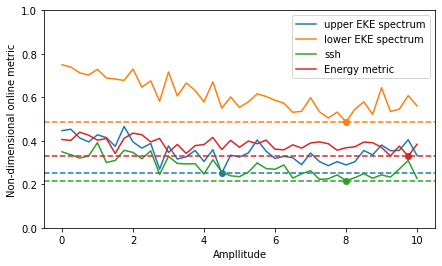

In [51]:
plot_amp_error(exps=[f'HPF-LPF-amplitude-{j/4.0}' for j in range(41)])

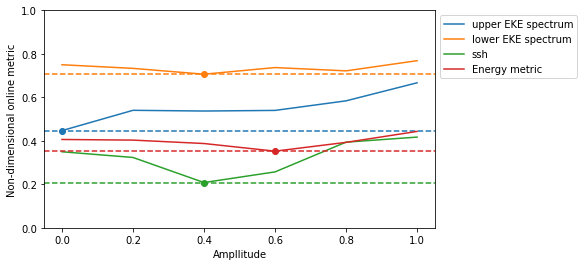

In [109]:
plot_amp_error(amp = np.linspace(0,1,6),exps=[f'stress_iter-1-stress_order-1-upper-{j}-10-lower-{j}-10' for j in [0,2,4,6,8,10]])



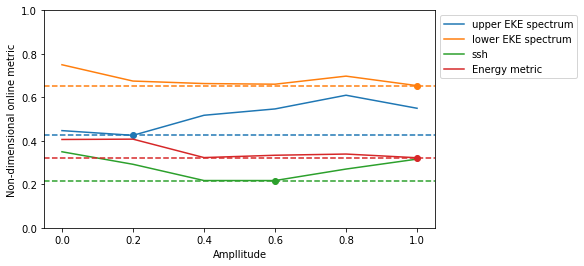

In [114]:
plot_amp_error(amp = np.linspace(0,1,6),exps=[f'stress_iter-2-stress_order-1-upper-{j}-10-lower-{j}-10' for j in [0,2,4,6,8,10]])



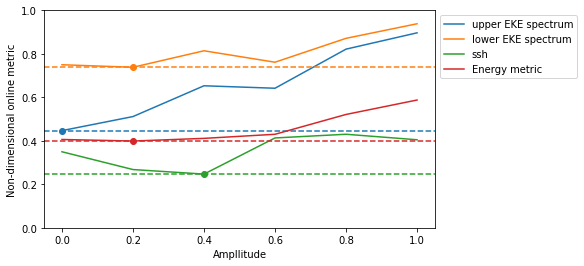

In [118]:
plot_amp_error(amp = np.linspace(0,1,6),exps=[f'stress_iter-1-stress_order-2-upper-{j}-10-lower-{j}-10' for j in [0,2,4,6,8,10]])



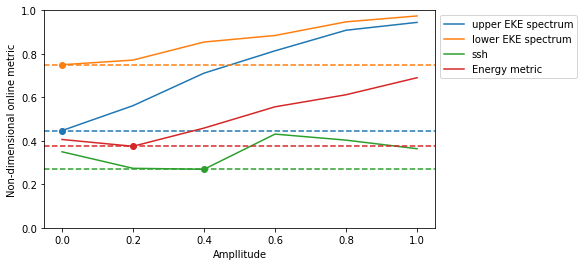

In [119]:
plot_amp_error(amp = np.linspace(0,1,6),exps=[f'stress_iter-1-stress_order-4-upper-{j}-10-lower-{j}-10' for j in [0,2,4,6,8,10]])

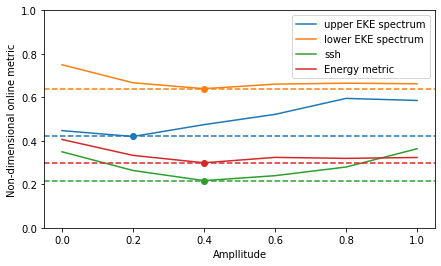

In [121]:
plot_amp_error(amp = np.linspace(0,1,6),exps=[f'stress_iter-4-stress_order-4-upper-{j}-10-lower-{j}-10' for j in [0,2,4,6,8,10]])

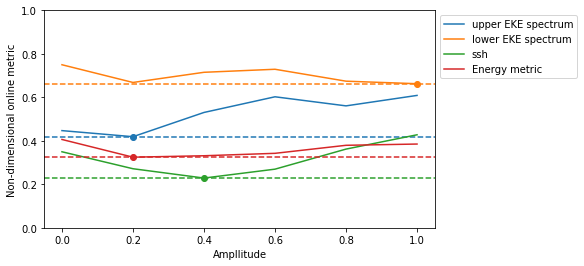

In [122]:
plot_amp_error(amp = np.linspace(0,1,6),exps=[f'stress_iter-2-stress_order-2-upper-{j}-10-lower-{j}-10' for j in [0,2,4,6,8,10]])

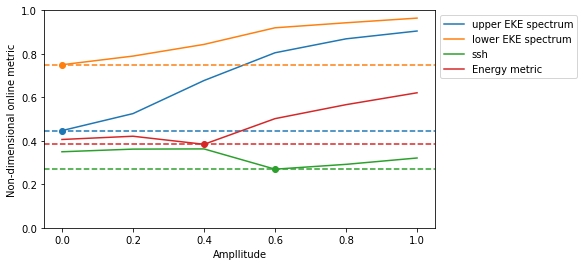

In [163]:
plot_amp_error(amp = np.linspace(0,1,6),exps=[f'upper-{j}-24-lower-{j}-24' for j in [0,2,4,6,8,10]])


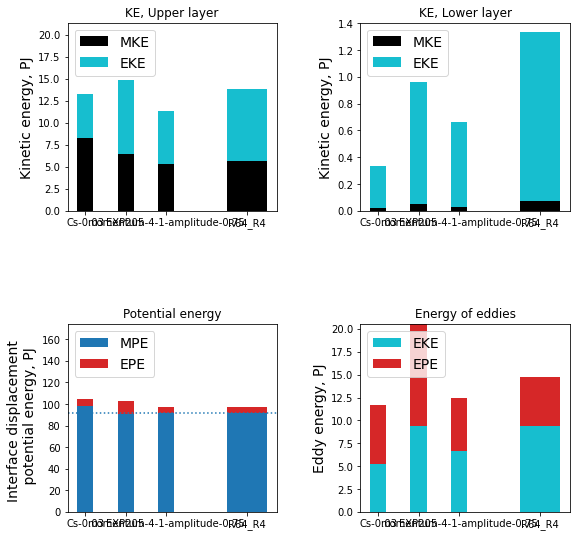

In [124]:
ds.plot_KE_PE(['Cs-0.03', 'EXP205', 'momentum-4-1-amplitude-0.75', 'R64_R4'])


In [155]:
d, S_11, S_12, S_22 = ds['R64_R4'].ZB_offline()
S_11 = S_11.compute()
S_12 = S_12.compute()
S_22 = S_22.compute()

In [156]:
SGS_11, SGS_12, SGS_22 = ds['R64_R4'].subgrid_momentum_flux
SGS_11 = SGS_11.compute()
SGS_12 = SGS_12.compute()
SGS_22 = SGS_22.compute()

In [157]:
def ave(x):
    return x.sel(Time=slice(3650,7300)).mean('Time')

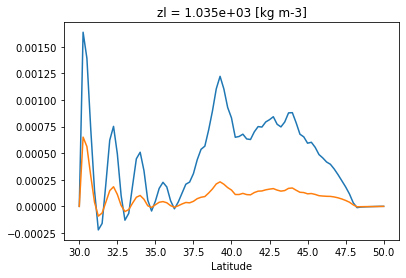

In [160]:
ave(S_12).isel(zl=0).mean('xq').plot()
ave(SGS_12).isel(zl=0).mean('xq').plot()

In [253]:
S = -ds['momentum-4-1-amplitude-0.75'].mom
S_205=-ds['EXP205'].mom
S_bad=-ds['Cs-0.03-ZB-6-24'].mom

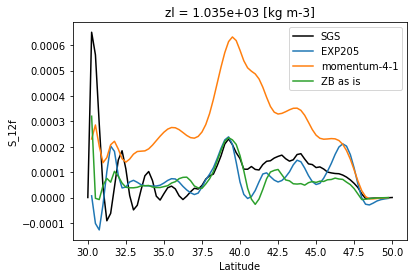

In [265]:
zl=0
key = 'S_12f'
ave(SGS_12).isel(zl=zl).mean('xq').plot(label='SGS', color='k')
ave(S_205[key]).isel(zl=zl).mean('xq').plot(label='EXP205')
ave(S[key]).isel(zl=zl).mean('xq').plot(label='momentum-4-1')
ave(S_bad[key]).isel(zl=zl).mean('xq').plot(label='ZB as is')
plt.legend()

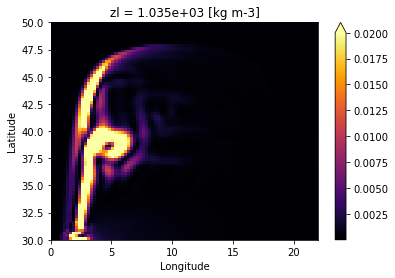

In [293]:
ds['best-EXP0'].MKE.isel(zl=0).plot(cmap='inferno',vmax=0.02)

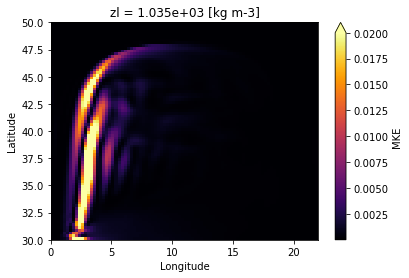

In [289]:
ds['momentum-4-1-amplitude-0.75'].MKE.isel(zl=0).plot(cmap='inferno',vmax=0.02)

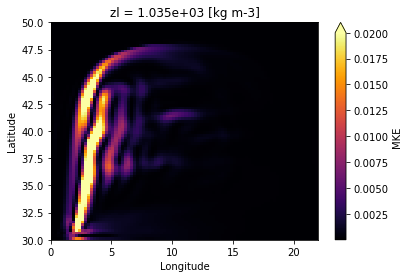

In [291]:
ds['best-EXP28'].MKE.isel(zl=0).plot(cmap='inferno',vmax=0.02)

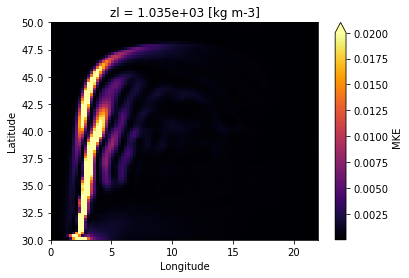

In [294]:
ds['R64_R4'].MKE.isel(zl=0).plot(cmap='inferno',vmax=0.02)

# Offline ZB

In [324]:
ref = ds['R64_R4'];
SGS = ref.SGS_transfer
ZB = ref.transfer(*ref.ZB_offline()[0])
Smag = ref.transfer(*ref.Smagorinsky())
EXP205 = ref.transfer(*ref.ZB_offline(LPF_iter=1,LPF_order=4,HPF_iter=2,HPF_order=2,Stress_iter=1,Stress_order=2)[0])

In [335]:
EXP205_noLPF = ref.transfer(*ref.ZB_offline(HPF_iter=2,HPF_order=2)[0])

In [359]:
ZB_mom_4_1 = ref.transfer(*ref.ZB_offline(Stress_iter=4,Stress_order=1)[0])

In [360]:
amp = {}
trans = {}
for key in ['ZB', 'EXP205', 'EXP205_noLPF', 'ZB_mom_4_1']:
    try:
        amp[key] = ((np.maximum(SGS,0).sum('freq_r') / np.maximum(eval(key),0).sum('freq_r'))).compute()
        trans[key] = amp[key] * eval(key)    
    except:
        pass

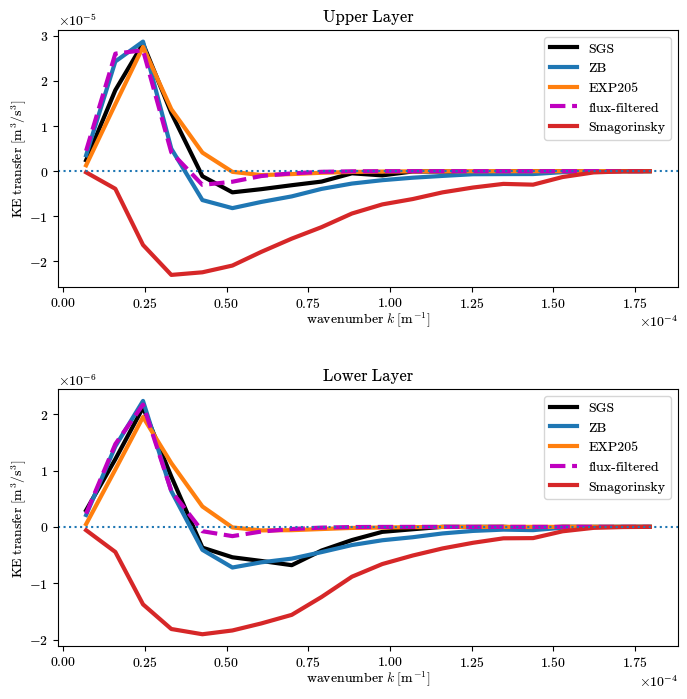

In [365]:
import matplotlib
matplotlib.rcParams.update({'font.family': 'MathJax_Main',
        'mathtext.fontset': 'cm','axes.formatter.limits': (-1,2), 
        'axes.formatter.use_mathtext': True, 'font.size': 16,
        'figure.subplot.hspace': 0.4})
plt.figure(figsize=(8,8))
plt
    
for zl in range(2):
    plt.subplot(2,1,zl+1)
    
    SGS.isel(zl=zl).plot(color='k',lw=3,label='SGS')
    trans['ZB'].isel(zl=zl).plot(lw=3,label='ZB')
    trans['EXP205'].isel(zl=zl).plot(lw=3,label='EXP205', color='tab:orange')
    trans['ZB_mom_4_1'].isel(zl=zl).plot(lw=3,label='flux-filtered', color='m', ls='--')
    Smag.isel(zl=zl).plot(lw=3,label='Smagorinsky',color='tab:red')
    plt.axhline(y=0,ls=':')
    if zl==0:
        plt.title('Upper Layer')
    else:
        plt.title('Lower Layer')
    plt.legend(bbox_to_anchor=(1,1))
    plt.xlabel('wavenumber $k$ [m$^{-1}$]')
    plt.ylabel('KE transfer [m$^3$/s$^3$]')
plt.savefig('EXP205-energy-transfer.pdf',bbox_inches='tight')

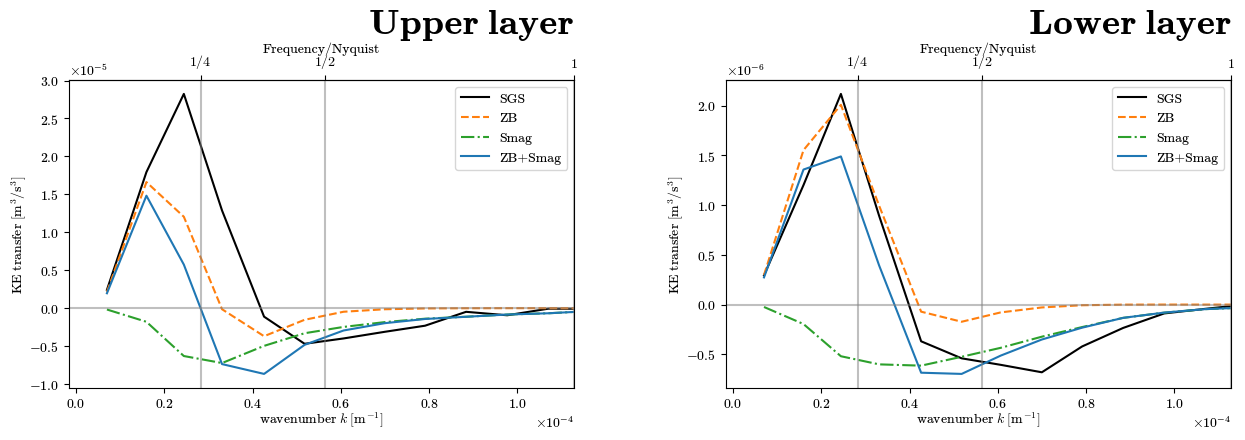

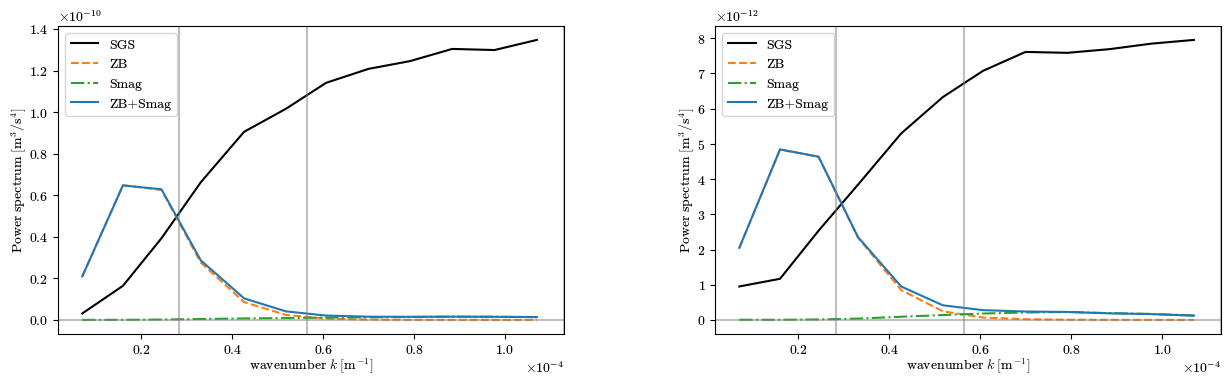

In [366]:
ds.plot_transfer('momentum-4-1-amplitude-0.75')

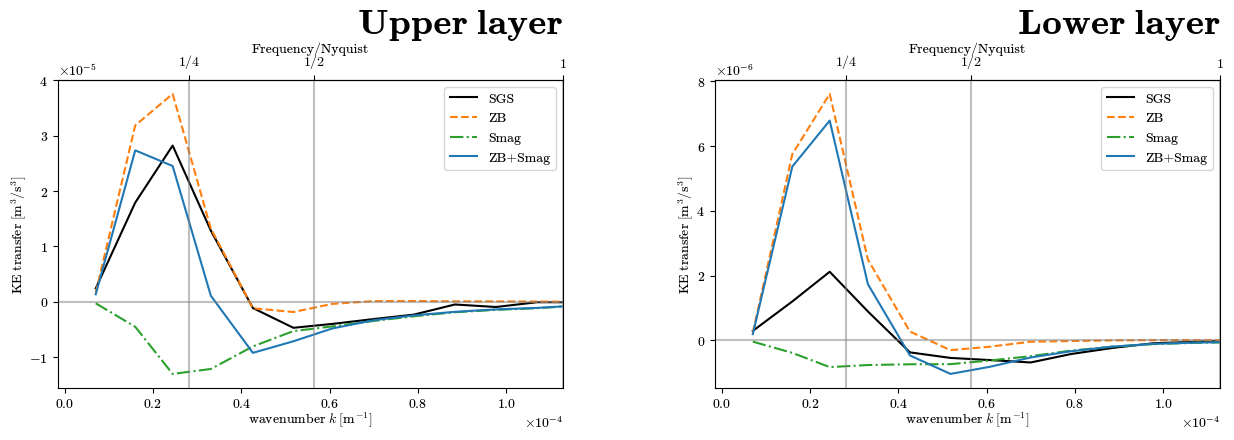

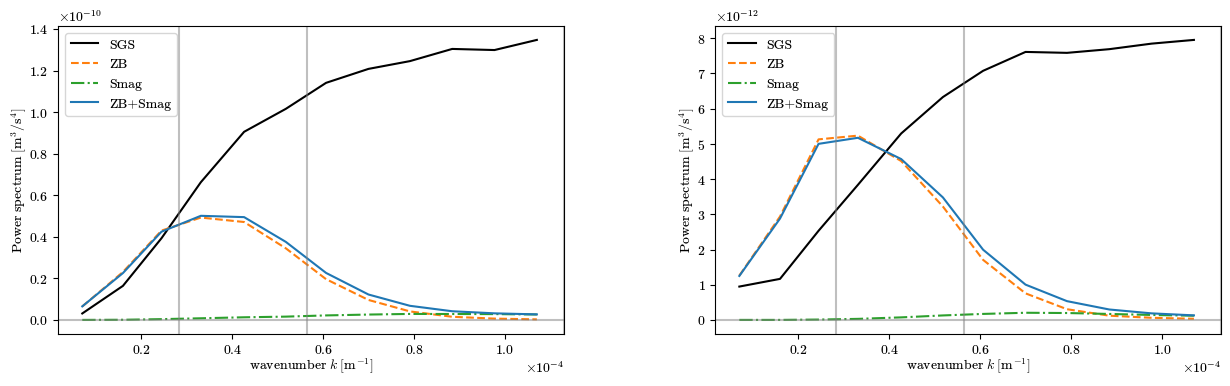

In [367]:
ds.plot_transfer('EXP205')

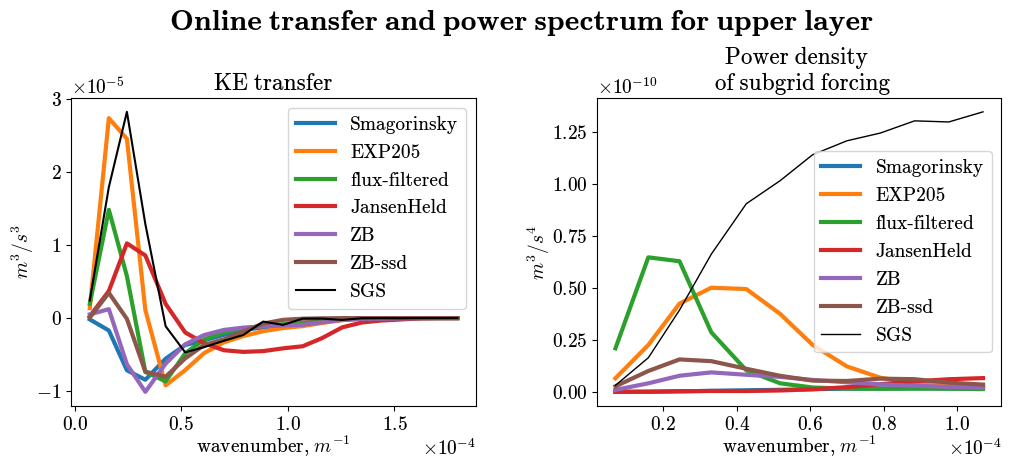

In [5]:
default_rcParams()
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
ds['Cs-0.03'].Model_transfer.isel(zl=0).plot(label='Smagorinsky', lw=3)
ds['EXP205'].Model_transfer.isel(zl=0).plot(label='EXP205', lw=3)
ds['momentum-4-1-amplitude-0.75'].Model_transfer.isel(zl=0).plot(label='flux-filtered', lw=3)
ds['R4-JH'].Model_transfer.isel(zl=0).plot(label='JansenHeld', lw=3)
ds['R4_ZB'].Model_transfer.isel(zl=0).plot(label='ZB', lw=3)
ds['R4_ZB-ssd'].Model_transfer.isel(zl=0).plot(label='ZB-ssd', lw=3)
ds['R64_R4'].SGS_transfer.isel(zl=0).plot(color='k', label='SGS')
plt.legend()
plt.xlabel('wavenumber, $m^{-1}$')
plt.title('KE transfer')
plt.ylabel('$m^3/s^3$')

plt.subplot(1,2,2)
ds['Cs-0.03'].Model_power.isel(zl=0).plot(label='Smagorinsky', lw=3)
ds['EXP205'].Model_power.isel(zl=0).plot(label='EXP205', lw=3)
ds['momentum-4-1-amplitude-0.75'].Model_power.isel(zl=0).plot(label='flux-filtered', lw=3)
ds['R4-JH'].Model_power.isel(zl=0).plot(label='JansenHeld', lw=3)
ds['R4_ZB'].Model_power.isel(zl=0).plot(label='ZB', lw=3)
ds['R4_ZB-ssd'].Model_power.isel(zl=0).plot(label='ZB-ssd', lw=3)
ds['R64_R4'].SGS_power.isel(zl=0).plot(color='k', label='SGS', lw=1)
plt.legend()
plt.xlabel('wavenumber, $m^{-1}$')
plt.title('Power density \n of subgrid forcing')
plt.ylabel('$m^3/s^4$')
plt.suptitle('Online transfer and power spectrum for upper layer', y=1.1, fontsize=20, fontweight='bold')
plt.savefig('transfer-power.pdf')

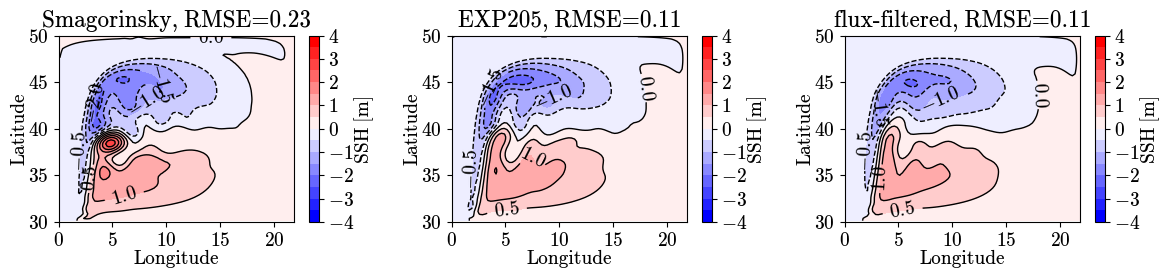

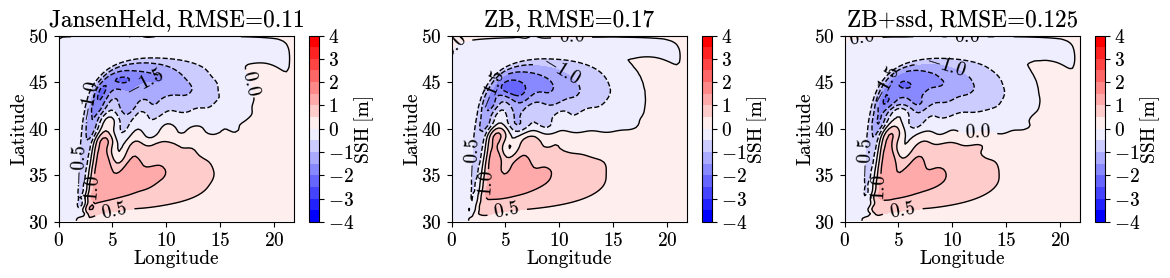

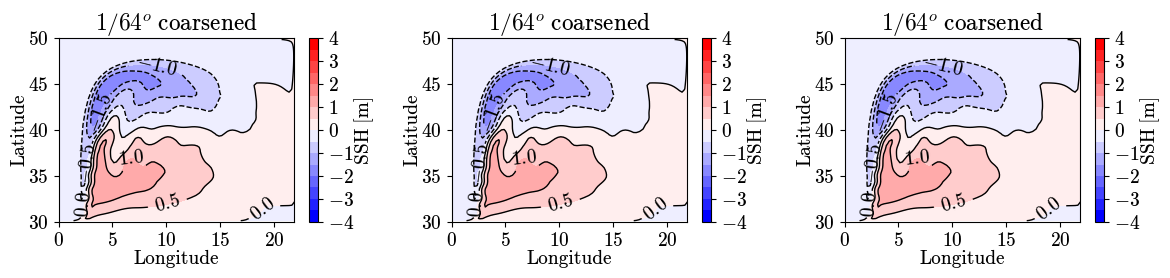

In [66]:
ds.plot_ssh(['Cs-0.03', 'EXP205', 'momentum-4-1-amplitude-0.75'], labels=['Smagorinsky, RMSE=0.23', 'EXP205, RMSE=0.11', 'flux-filtered, RMSE=0.11'])
ds.plot_ssh(['R4-JH', 'R4_ZB', 'R4_ZB-ssd'], labels=['JansenHeld, RMSE=0.11', 'ZB, RMSE=0.17', 'ZB+ssd, RMSE=0.125'])
ds.plot_ssh(['R64_R4', 'R64_R4', 'R64_R4'], labels=['$1/64^o$ coarsened']*3)

In [63]:
Lk_error(ds['R4_ZB-ssd'].ssh_mean,ds['R64_R4'].ssh_mean, normalize=False)

[0.125293]

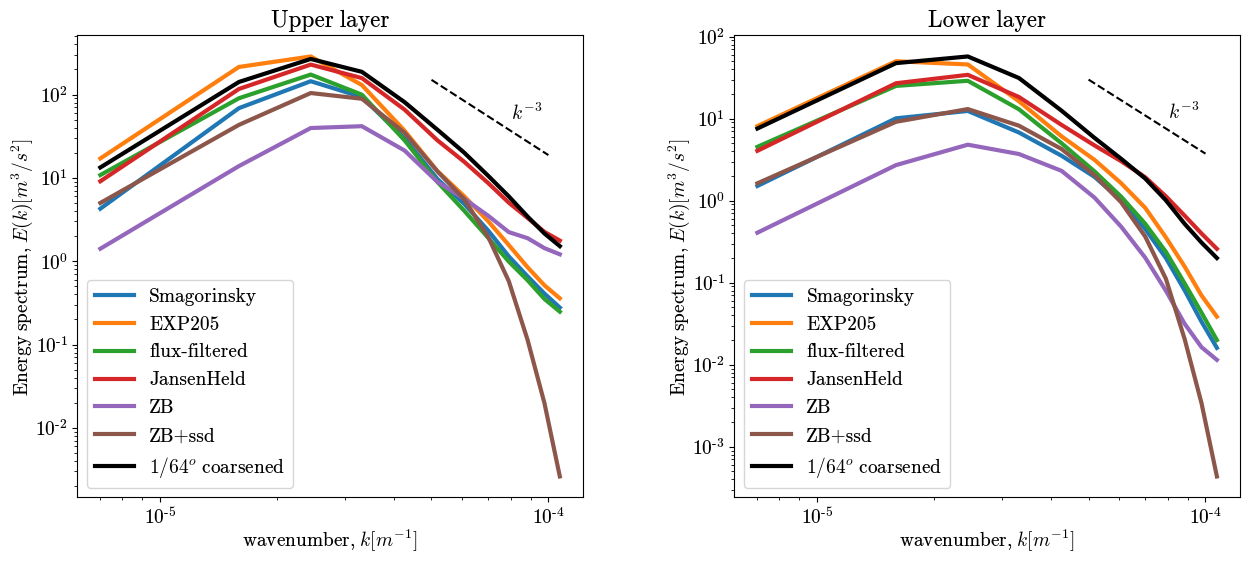

In [72]:
ds.plot_KE_spectrum(['Cs-0.03', 'EXP205', 'momentum-4-1-amplitude-0.75', 'R4-JH', 'R4_ZB', 'R4_ZB-ssd', 'R64_R4'],
                   labels=['Smagorinsky', 'EXP205', 'flux-filtered', 'JansenHeld', 'ZB', 'ZB+ssd', '$1/64^o$ coarsened'])
plt.savefig('KE_spectrum.pdf')

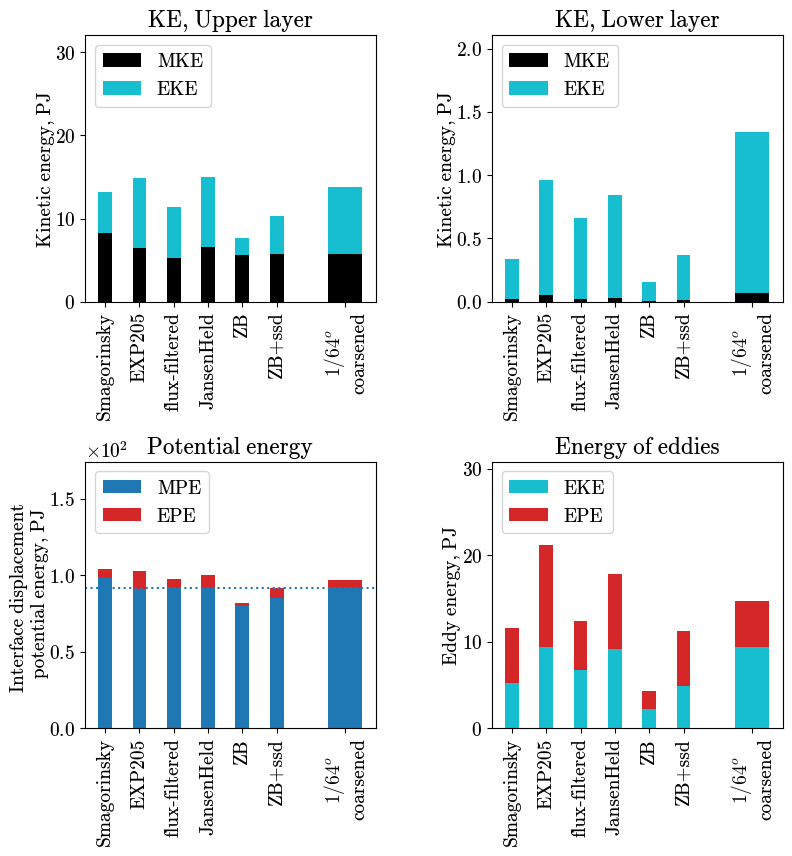

In [81]:
ds.plot_KE_PE(['Cs-0.03', 'EXP205', 'momentum-4-1-amplitude-0.75', 'R4-JH', 'R4_ZB', 'R4_ZB-ssd', 'R64_R4'],
                   labels=['Smagorinsky', 'EXP205', 'flux-filtered', 'JansenHeld', 'ZB', 'ZB+ssd', '$1/64^o$ \ncoarsened'])
plt.savefig('Energy_metrics.pdf')

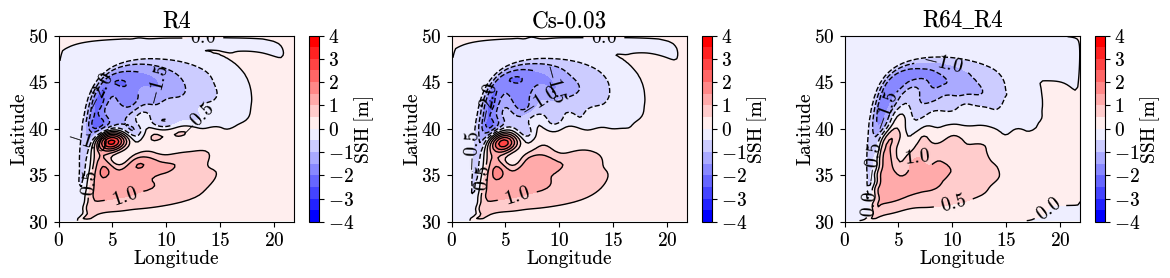

In [7]:
ds.plot_ssh(['R4', 'Cs-0.03', 'R64_R4'])